The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
number of items: 1000, number of users: 10000


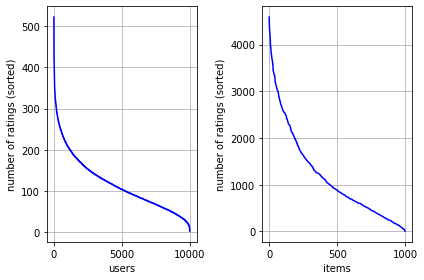

Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1118030
Total number of nonzero elements in test data:58843
learn the matrix factorization using SGD...
initial RMSE on training set: 0.9895694584839616, RMSE on testing set: 0.998228148543449.
iter: 0, RMSE on training set: 0.9895457241206587, RMSE on testing set: 0.9982242172888628.
iter: 1, RMSE on training set: 0.9893578129485321, RMSE on testing set: 0.9981272435144094.
iter: 2, RMSE on training set: 0.9865151281388959, RMSE on testing set: 0.996383264848185.
iter: 3, RMSE on training set: 0.9767397131271173, RMSE on testing set: 0.9909515913206348.
iter: 4, RMSE on training set: 0.9678361397149792, RMSE on testing set: 0.9871523411001446.
iter: 5, RMSE on training set: 0.9592176396713107, RMSE on testing set: 0.9843514574994547.
iter: 6, RMSE on training set: 0.9496826180165784, RMSE on testing set: 0.982127201066167.
iter: 7, RMSE on training set: 0.9394993170578579, RMSE on t

0.9777649688872941

In [14]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import scipy.io
import scipy.sparse as sp

from scipy import stats # to fit linear regression
from math import sqrt

%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '../utilities/')
from helpers import *
from plots import *
from implementations import *
from baselines import *

#load data
DATA_TRAIN_PATH = '../Datasets/data_train.csv'
ratings = load_data(DATA_TRAIN_PATH)
num_items_per_user, num_users_per_item = plot_raw_data(ratings)

seed=1000
#split test train
valid_ratings, train, test = split_data(
    ratings, num_items_per_user, num_users_per_item, 10, 0.05,seed)
#baseline
rmse_te, w_item, w_user, w_0 = baseline_item_user(train, test)

#calculate predictions baseline
pred_train = w_item[train.row] + w_user[train.col] + w_0
pred_test = w_item[test.row] + w_user[test.col] + w_0
#substraction of baseline
train_baseline_corrected = sp.coo_matrix((train.data - pred_train, (train.row, train.col)),
                                         shape=train.get_shape())
test_baseline_corrected = sp.coo_matrix((test.data - pred_test, (test.row, test.col)), shape=test.get_shape())

#parameters definition for SGD
num_features_linear = 96   # K in the lecture notes
lambda_user_linear = 0.1698534010446083
lambda_item_linear = 0.020631232619235364
num_epochs_linear = 20
gamma_linear = 0.05561936186938201
decrement_step_linear = 1.1563058680288183
stop_criterion=0

#SGD 
min_rmse_te_SGD_bc, user_features_SGD_bc, item_features_SGD_bc = \
    matrix_factorization_SGD_regularized_predict(train_baseline_corrected,
                                                 test_baseline_corrected, num_features_linear,
                                                 lambda_user_linear, lambda_item_linear,
                                                 gamma_linear, decrement_step_linear,
                                                 num_epochs_linear, seed, stop_criterion,True)
#shows error
compute_error(test_baseline_corrected.data, user_features_SGD_bc, item_features_SGD_bc, 
              (test_baseline_corrected.row,test_baseline_corrected.col))

In [15]:
#prediction
prediction = compute_prediction_baseline_linear(ratings, valid_ratings.shape, 
                                                                  item_features_SGD_bc,
                                                                  user_features_SGD_bc, num_items_per_user,
                                                                  num_users_per_item, 10,w_item, w_user, w_0
                                                                  )
#discretization
prediction_discretized = np.rint(prediction)
#read positions to submit
DATA_SAMPLE_SUBMISSION_PATH = '../Datasets/sample_submission.csv'
ratings_submission_csv = load_data(DATA_SAMPLE_SUBMISSION_PATH)
rows_submission,cols_submission = ratings_submission_csv.tocoo().nonzero()
ids_test = ['r' + str(ind_col+1) + '_c' + str(ind_row+1) for ind_row, ind_col in zip(rows_submission,cols_submission)]
#output
OUTPUT_PATH = '../Datasets/final_submission.csv'
pred_submission = prediction_discretized[rows_submission,cols_submission].astype('int')
create_csv_submission(ids_test, pred_submission, OUTPUT_PATH)


number of items: 1000, number of users: 10000
